In [1]:
# Get the essential library imports
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

matplotlib.style.use('ggplot')

In [3]:
# importing the dataset
leads_master = pd.read_csv("Leads.csv")
leads_copy = leads_master
leads_copy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# dataset - analysis
leads_copy.shape

(9240, 37)

In [5]:
leads_copy.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# dropping columns with unique values
leads_copy.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [8]:
leads_copy.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
leads_copy.replace('Select', np.nan)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [10]:
leads_copy.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
# missing values in percentage
round(100*(leads_copy.isnull().sum()/len(leads_copy.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
round(100*(leads_copy.isnull().sum()/len(leads_copy.index)), 2).mode()

0    0.0
dtype: float64

In [13]:
for i in leads_copy.columns:
    if((100*(leads_copy[i].isnull().sum()/len(leads_copy.index))) >= 35):
        leads_copy.drop(i, 1, inplace = True)

In [14]:
round(100*(leads_copy.isnull().sum()/len(leads_copy.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# Categorical ananlysis of columns and checking the null values
leads_copy['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [16]:
leads_copy['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
leads_copy.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)
leads_copy.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [18]:
leads_copy.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

In [19]:
leads_copy.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,Mumbai,No,Modified


In [20]:
leads_copy.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,Mumbai,No,Modified


In [21]:
# Check the number of null values again

leads_copy.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            1438
What is your current occupation           2690
City                                      1420
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [22]:
leads_copy.drop(['City', 'Country'], axis = 1, inplace = True)
leads_copy.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [23]:
leads_copy['What is your current occupation'] = leads_copy['What is your current occupation'].replace(np.nan, 'Unemployed')
leads_copy.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [24]:
#checking count of values
leads_copy['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# Check the number of null values again

leads_copy.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [26]:
# Analysing the Tags column
#leads_copy['Tags'].value_counts(dropna = False)

In [27]:
#leads_copy = leads_copy[~leads_copy['Tags'].isnull()]
#leads_copy.Tags.value_counts(dropna=False)

In [28]:
# Check the number of null values again

leads_copy.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [29]:
leads_copy.Specialization.value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
leads_copy.Specialization = leads_copy.Specialization.replace('NaN','Student/Fresher')
leads_copy.Specialization = leads_copy.Specialization.replace('Select',np.nan)
leads_copy.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [31]:
leads_copy.Specialization = leads_copy.Specialization.replace(['NaN'],'Student/Fresher')
leads_copy = leads_copy[~leads_copy['Specialization'].isnull()]
leads_copy.Specialization.value_counts(dropna=False)

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [32]:
leads_copy['Lead Source'].value_counts(dropna=False)

Direct Traffic       2381
Google               1969
Organic Search        787
Reference             390
Olark Chat            242
Referral Sites         35
Facebook               16
Welingak Website       15
NaN                     8
Click2call              4
Press_Release           2
Social Media            2
bing                    2
blog                    1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [33]:
leads_copy = leads_copy[~leads_copy['Lead Source'].isnull()]
leads_copy['Lead Source'].value_counts(dropna=False)

Direct Traffic       2381
Google               1969
Organic Search        787
Reference             390
Olark Chat            242
Referral Sites         35
Facebook               16
Welingak Website       15
Click2call              4
bing                    2
Press_Release           2
Social Media            2
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

In [34]:
# Check the number of null values again

leads_copy.isnull().sum()

Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                               60
Total Time Spent on Website                0
Page Views Per Visit                      60
Last Activity                             49
Specialization                             0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [35]:
leads_copy.shape

(5852, 12)

In [36]:
# Analysing the last activity column
leads_copy['Last Activity'].value_counts(dropna=False)

Email Opened                    2344
SMS Sent                        1933
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    209
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       73
NaN                               49
Unsubscribed                      44
Had a Phone Conversation          24
Approached upfront                 3
View in browser link Clicked       3
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [37]:
leads_copy = leads_copy[~leads_copy['Last Activity'].isnull()]
leads_copy['Last Activity'].value_counts(dropna=False)

Email Opened                    2344
SMS Sent                        1933
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    209
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       73
Unsubscribed                      44
Had a Phone Conversation          24
View in browser link Clicked       3
Approached upfront                 3
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [38]:
# Check the number of null values again

leads_copy.isnull().sum()

Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                               11
Total Time Spent on Website                0
Page Views Per Visit                      11
Last Activity                              0
Specialization                             0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [39]:
leads_copy = leads_copy[~leads_copy['TotalVisits'].isnull()]
leads_copy.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [40]:
# visualisations for the EDA
leads_copy_1 = leads_copy
leads_converted = leads_copy_1[leads_copy_1['Converted'] == 1]
leads_converted.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified


In [41]:
list(set(leads_converted['Lead Source']))

['Social Media',
 'bing',
 'Organic Search',
 'Facebook',
 'Direct Traffic',
 'Welingak Website',
 'Click2call',
 'Google',
 'NC_EDM',
 'Referral Sites',
 'Olark Chat',
 'Reference',
 'WeLearn']

In [42]:
# Relationship between specialization, Time Spent on websites and Lead source
leads_converted_table = pd.pivot_table(data=leads_converted, values="Total Time Spent on Website", index="Specialization", columns="Lead Source", aggfunc=sum)
leads_converted_table = leads_converted_table.fillna(0)
leads_converted_table.head()

Lead Source,Click2call,Direct Traffic,Facebook,Google,NC_EDM,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing
Specialization,,,,,,,,,,,,,
"Banking, Investment And Insurance",0.0,54492.0,0.0,52796.0,0.0,3930.0,14592.0,1678.0,865.0,0.0,0.0,0.0,0.0
Business Administration,0.0,52457.0,0.0,74854.0,0.0,3740.0,15114.0,0.0,1653.0,0.0,0.0,0.0,0.0
E-Business,0.0,10062.0,0.0,6436.0,0.0,0.0,2103.0,288.0,0.0,0.0,0.0,0.0,0.0
E-COMMERCE,0.0,13354.0,0.0,6454.0,0.0,1448.0,4562.0,145.0,0.0,0.0,0.0,0.0,0.0
Finance Management,0.0,119293.0,0.0,169863.0,0.0,6553.0,38607.0,12216.0,2053.0,0.0,0.0,0.0,0.0


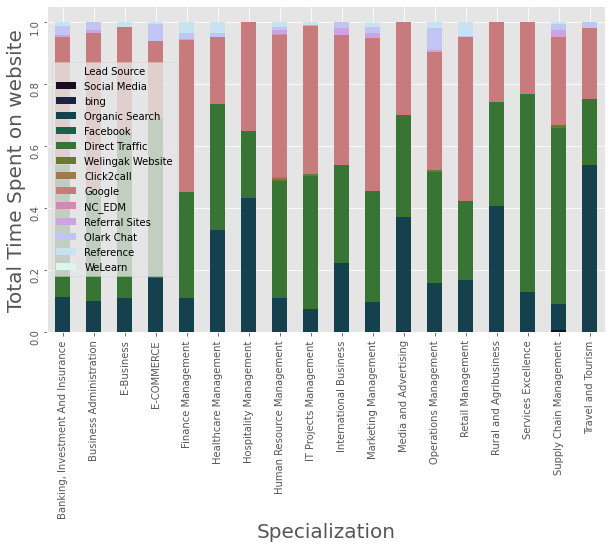

In [43]:
leads_converted_table_perc = leads_converted_table[list(set(leads_converted['Lead Source']))].apply(lambda x: x/x.sum(), axis=1)
colors = sns.color_palette("cubehelix", n_colors=len(list(set(leads_converted['Lead Source']))))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
leads_converted_table_perc.plot(kind="bar", stacked="True", figsize=[10,6], colormap=cmap1)
plt.rc('axes', labelsize=20) 
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=90)
plt.ylabel("Total Time Spent on website", fontdict = {'fontsize' : 20})
plt.xlabel("Specialization", fontdict = {'fontsize' : 20})
plt.show()

In [44]:
list(set(leads_converted['What is your current occupation']))

['Businessman',
 'Housewife',
 'Other',
 'Working Professional',
 'Unemployed',
 'Student']

In [45]:
# Relationship between specialization, Time Spent on websites and What is your current occupation
leads_converted_table = pd.pivot_table(data=leads_converted, values="Total Time Spent on Website", index="Specialization", columns="What is your current occupation", aggfunc=sum)
leads_converted_table = leads_converted_table.fillna(0)
leads_converted_table.head()

What is your current occupation,Businessman,Housewife,Other,Student,Unemployed,Working Professional
Specialization,,,,,,
"Banking, Investment And Insurance",0.0,0.0,0.0,8470.0,102722.0,17161.0
Business Administration,0.0,734.0,2377.0,2935.0,102906.0,38866.0
E-Business,0.0,0.0,0.0,913.0,15882.0,2094.0
E-COMMERCE,1647.0,0.0,0.0,0.0,20587.0,3729.0
Finance Management,0.0,1646.0,0.0,11370.0,271078.0,64491.0


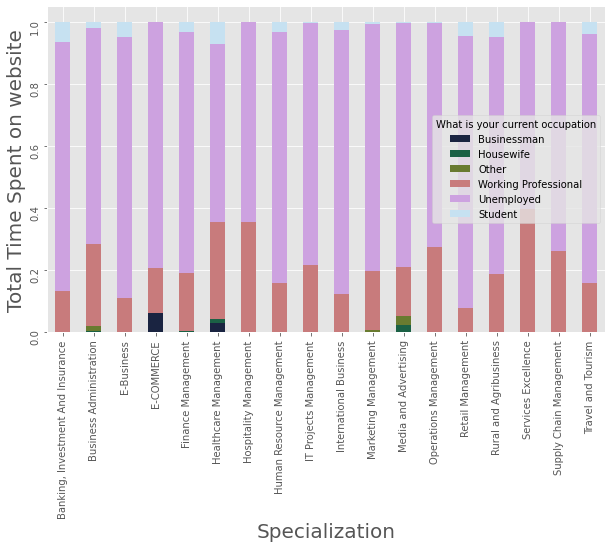

In [46]:
leads_converted_table_perc = leads_converted_table[list(set(leads_converted['What is your current occupation']))].apply(lambda x: x/x.sum(), axis=1)
colors = sns.color_palette("cubehelix", n_colors=len(list(set(leads_converted['What is your current occupation']))))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
leads_converted_table_perc.plot(kind="bar", stacked="True", figsize=[10,6], colormap=cmap1)
plt.rc('axes', labelsize=20) 
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=90)
plt.ylabel("Total Time Spent on website", fontdict = {'fontsize' : 20})
plt.xlabel("Specialization", fontdict = {'fontsize' : 20})
plt.show()

In [47]:
# visualisations for the EDA
leads_not_converted = leads_copy_1[leads_copy_1['Converted'] == 0]
leads_not_converted.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Yes,Email Opened
9,API,Google,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No,Email Opened
13,Landing Page Submission,Organic Search,No,0,5.0,170,5.0,Email Opened,Business Administration,Unemployed,Yes,Email Opened
14,Landing Page Submission,Direct Traffic,Yes,0,1.0,481,1.0,Email Bounced,Business Administration,Unemployed,No,Email Bounced


In [48]:
# Relationship between specialization, Time Spent on websites and Lead source
leads_not_converted_table = pd.pivot_table(data=leads_not_converted, values="Total Time Spent on Website", index="Specialization", columns="Lead Source", aggfunc=sum)
leads_not_converted_table = leads_not_converted_table.fillna(0)
leads_not_converted_table.head()

Lead Source,Click2call,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,bing,blog,testone,welearnblog_Home,youtubechannel
Specialization,,,,,,,,,,,,,,,,
"Banking, Investment And Insurance",0.0,33536.0,0.0,27637.0,1903.0,9572.0,0.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0
Business Administration,0.0,44876.0,0.0,34948.0,3756.0,16264.0,0.0,0.0,0.0,0.0,0.0,0.0,677.0,0.0,0.0,487.0
E-Business,0.0,9746.0,0.0,4028.0,0.0,2664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E-COMMERCE,0.0,17441.0,0.0,6827.0,74.0,2744.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Finance Management,0.0,114140.0,0.0,83527.0,7978.0,22713.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


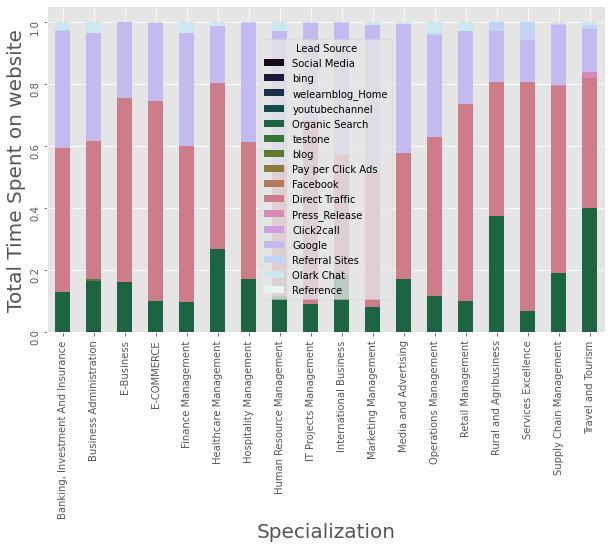

In [49]:
leads_converted_table_perc = leads_not_converted_table[list(set(leads_not_converted['Lead Source']))].apply(lambda x: x/x.sum(), axis=1)
colors = sns.color_palette("cubehelix", n_colors=len(list(set(leads_not_converted['Lead Source']))))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
leads_converted_table_perc.plot(kind="bar", stacked="True", figsize=[10,6], colormap=cmap1)
plt.rc('axes', labelsize=20) 
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=90)
plt.ylabel("Total Time Spent on website", fontdict = {'fontsize' : 20})
plt.xlabel("Specialization", fontdict = {'fontsize' : 20})
plt.show()

In [50]:
# Relationship between specialization, Time Spent on websites and Lead source
leads_not_converted_table = pd.pivot_table(data=leads_not_converted, values="Total Time Spent on Website", index="Specialization", columns="What is your current occupation", aggfunc=sum)
leads_not_converted_table = leads_not_converted_table.fillna(0)
leads_not_converted_table.head()

What is your current occupation,Businessman,Other,Student,Unemployed,Working Professional
Specialization,,,,,
"Banking, Investment And Insurance",0.0,0.0,1064.0,70376.0,1353.0
Business Administration,63.0,1679.0,1012.0,98038.0,216.0
E-Business,0.0,0.0,0.0,15947.0,491.0
E-COMMERCE,0.0,0.0,0.0,27086.0,0.0
Finance Management,0.0,1231.0,3790.0,221803.0,1534.0


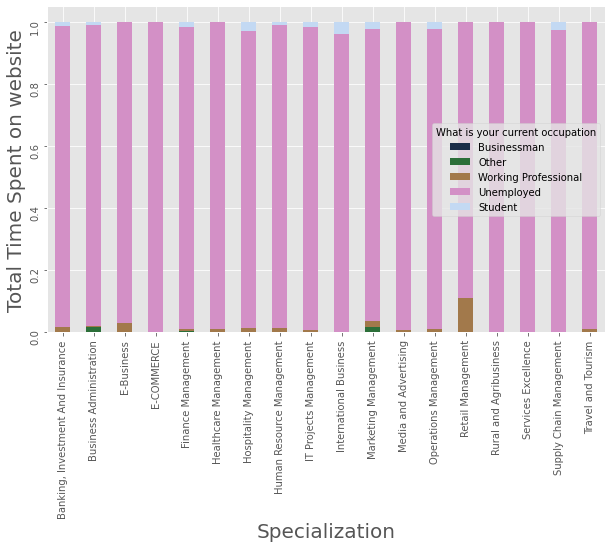

In [51]:
leads_converted_table_perc = leads_not_converted_table[list(set(leads_not_converted['What is your current occupation']))].apply(lambda x: x/x.sum(), axis=1)
colors = sns.color_palette("cubehelix", n_colors=len(list(set(leads_not_converted['What is your current occupation']))))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
leads_converted_table_perc.plot(kind="bar", stacked="True", figsize=[10,6], colormap=cmap1)
plt.rc('axes', labelsize=20) 
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=90)
plt.ylabel("Total Time Spent on website", fontdict = {'fontsize' : 20})
plt.xlabel("Specialization", fontdict = {'fontsize' : 20})
plt.show()

In [52]:
# Check the columns which are of type 'object'

categorical_columns = leads_copy.loc[:, leads_copy.dtypes == 'object'].columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
leads_copy.Specialization.value_counts(dropna=False)

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [54]:
leads_copy['Last Activity'].value_counts(dropna=False)

Email Opened                    2344
SMS Sent                        1932
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    205
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       71
Unsubscribed                      44
Had a Phone Conversation          20
View in browser link Clicked       3
Approached upfront                 3
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [55]:
# Create dummy variable
categorical_data = pd.get_dummies(leads_copy[categorical_columns], drop_first=True)

# Add the results to the master dataframe
leads_copy = pd.concat([leads_copy, categorical_data], axis=1)

# Drop the categorical variables

leads_copy = leads_copy.drop(categorical_columns, 1)

leads_copy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,2.0,71,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,4.0,58,4.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
leads_copy.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activi

In [57]:
# Checking the % of missing values
round(100*(leads_copy.isnull().sum()/len(leads_copy.index)),2)

Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Lead Origin_Landing Page Submission                   0.0
                                                     ... 
Last Notable Activity_Page Visited on Website         0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 78, dtype: float64

In [58]:
# test-train split
from sklearn.model_selection import train_test_split

In [59]:
# Putting feature variable to x
X = leads_copy.drop(["Converted"],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,2.0,71,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4.0,58,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Putting response variable to y
y = leads_copy["Converted"]
y.head()

2    1
3    0
6    1
8    0
9    0
Name: Converted, dtype: int64

In [61]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [62]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,...,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000
mean,4.387272,600.641589,3.007504,0.819191,0.063888,0.002713,0.408979,0.002713,0.335471,0.000247,...,0.000247,0.000247,0.002467,0.307351,0.006167,0.042181,0.269117,0.004193,0.004193,0.000247
std,5.606339,551.065454,2.000570,0.384907,0.244583,0.052026,0.491706,0.052026,0.472213,0.015706,...,0.015706,0.015706,0.049611,0.461453,0.078296,0.201026,0.443556,0.064628,0.064628,0.015706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,131.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,363.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1073.750000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,251.000000,2272.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# feature scaling using the standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3188,-0.782652,-1.090099,-1.503509,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8278,-0.069086,-0.398625,0.496168,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8129,0.466089,0.654011,-0.628650,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2393,-0.247478,0.394482,-0.003751,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1016,-0.247478,-0.494815,-0.003751,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
### Checking the Conversion rate
converted = (sum(leads_copy['Converted'])/len(leads_copy['Converted'].index))*100
converted

43.75

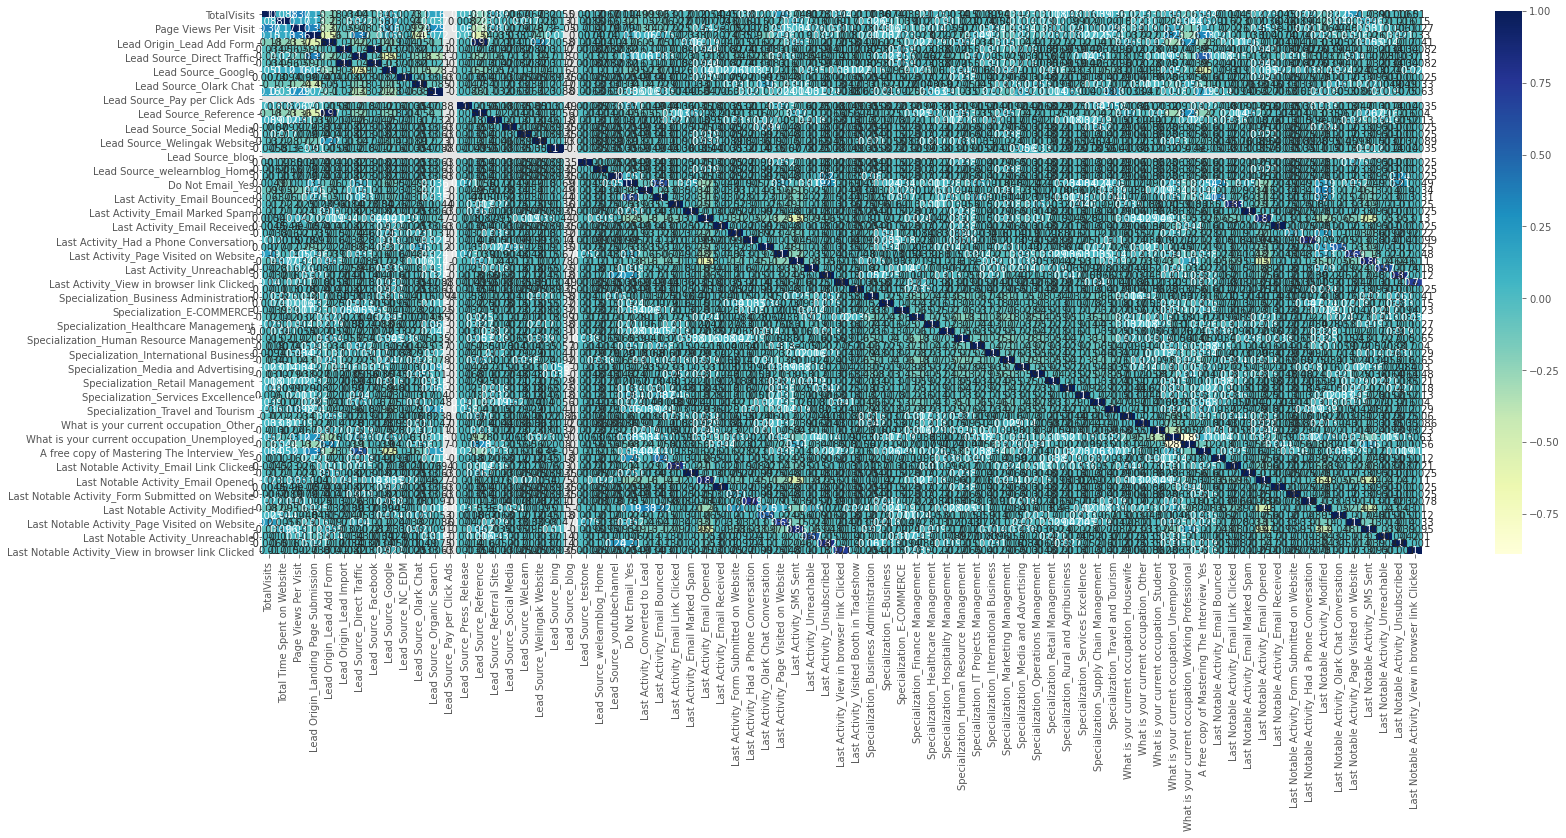

In [65]:
# correlation matrix
plt.figure(figsize=(26,10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [66]:
## feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [67]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train,y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 37),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 13),
 ('Lead Source_Google', False, 8),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 38),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 62),
 ('Lead Source_Press_Release', False, 40),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_blog', False, 63),
 ('Lead Source_testone', False, 25),
 ('Lead Source_welearnblog_Home', False, 21),
 ('Lead Source_youtubechannel', False, 24),
 ('Do Not Email_Yes', True, 1),
 ('

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last A

In [71]:
## Assessing the models with stats models

X_train = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1775.3
Date:                Wed, 20 Oct 2021   Deviance:                       3550.5
Time:                        19:38:20   Pearson chi2:                 4.58e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2478      0.137      9.082      0.000       0.979       1.517
Total Time Spent on Website                              1.0590      0.045     23.485      0.000       0.971       1.147
Lead Origin_Landing Page Submission                     -1.2204      0.129     -9.472      0.000      -1.473      -0.968
Lead Origin_Lead Add Form                               -0.5104      1.428     -0.357      0.721      -3.310       2.289
Lead Source_Reference                                    3.8165      1.462      2.610      0.009       0.950       6.683
Lead Source_Referral Sites                               1.9301      0.576      3.353      0.001       0.802       3.058
Lead Source_Welingak Website                            24.5115   1.98e+04      0.001      0.999   -3.88e+04    3.88e+04
Do Not Email_Yes                                        -1.5050      0.235     -6.403      0.000      -1.966      -1.044
Last Activity_Email Bounced                             -1.0918      0.488     -2.237      0.025      -2.048      -0.135
Last Activity_Form Submitted on Website                 -0.9656      0.359     -2.688      0.007      -1.670      -0.261
What is your current occupation_Housewife               24.0014   2.71e+04      0.001      0.999   -5.31e+04    5.32e+04
What is your current occupation_Working Professional     2.9467      0.224     13.166      0.000       2.508       3.385
Last Notable Activity_Email Link Clicked                -1.1857      0.313     -3.786      0.000      -1.800      -0.572
Last Notable Activity_Email Opened                      -1.0008      0.100    -10.016      0.000      -1.197      -0.805
Last Notable Activity_Had a Phone Conversation           2.3470      1.086      2.162      0.031       0.219       4.475
Last Notable Activity_Modified                          -1.4468      0.112    -12.962      0.000      -1.666      -1.228
========================================================================================================================
"""

In [72]:
# drop the column 'What is your current occupation_Housewife' from the train model and retrain it
X_train.drop(['What is your current occupation_Housewife','Lead Origin_Lead Add Form','Lead Source_Welingak Website'], axis = 1, inplace = True)
X_train.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Referral Sites,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified
3188,1.0,-1.090099,0,1,0,0,0,0,0,0,0,0,0
8278,1.0,-0.398625,1,0,0,0,0,0,0,0,0,0,1
8129,1.0,0.654011,1,0,0,0,0,0,0,0,0,0,0
2393,1.0,0.394482,0,0,0,0,0,0,0,0,1,0,0
1016,1.0,-0.494815,1,0,0,0,0,0,0,0,0,0,1


In [73]:
# retrain with the corrected model
logm2 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4041
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1792.2
Date:                Wed, 20 Oct 2021   Deviance:                       3584.3
Time:                        19:38:21   Pearson chi2:                 4.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3307      0.136      9.807      0.000       1.065       1.597
Total Time Spent on Website                              1.0478      0.045     23.352      0.000       0.960       1.136
Lead Origin_Landing Page Submission                     -1.3043      0.127    -10.280      0.000      -1.553      -1.056
Lead Source_Reference                                    3.2334      0.355      9.109      0.000       2.538       3.929
Lead Source_Referral Sites                               1.8968      0.578      3.282      0.001       0.764       3.030
Do Not Email_Yes                                        -1.5132      0.235     -6.441      0.000      -1.974      -1.053
Last Activity_Email Bounced                             -1.0966      0.487     -2.249      0.024      -2.052      -0.141
Last Activity_Form Submitted on Website                 -1.0067      0.359     -2.802      0.005      -1.711      -0.303
What is your current occupation_Working Professional     2.9186      0.224     13.052      0.000       2.480       3.357
Last Notable Activity_Email Link Clicked                -1.1845      0.312     -3.801      0.000      -1.795      -0.574
Last Notable Activity_Email Opened                      -0.9877      0.099     -9.930      0.000      -1.183      -0.793
Last Notable Activity_Had a Phone Conversation           2.3337      1.086      2.149      0.032       0.205       4.462
Last Notable Activity_Modified                          -1.4268      0.111    -12.865      0.000      -1.644      -1.209
========================================================================================================================
"""

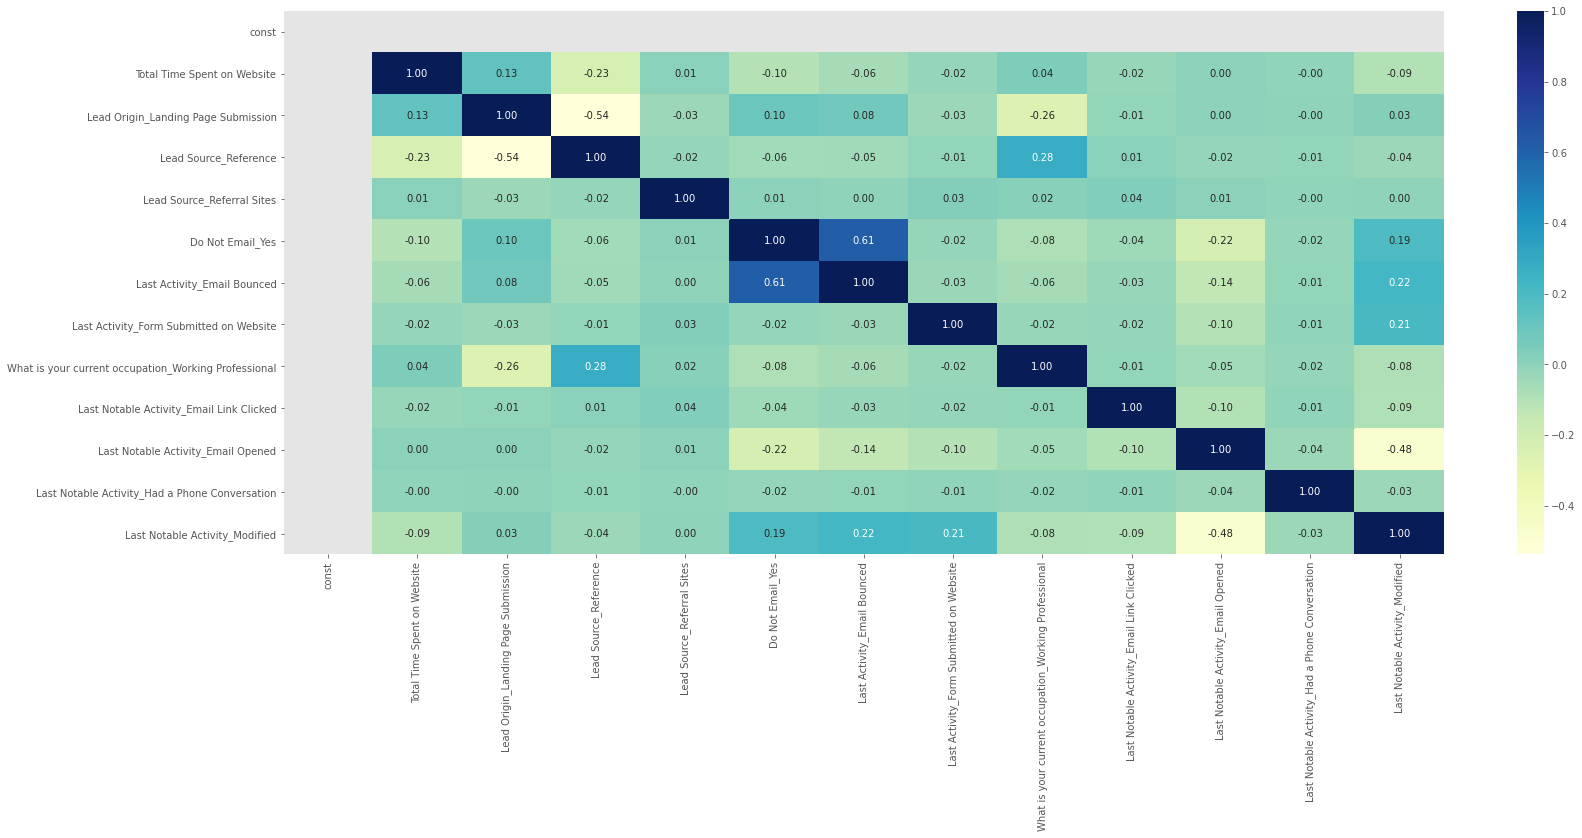

In [74]:
# correlation matrix after removing the invalid columns
plt.figure(figsize=(26,10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu",fmt='.2f')
plt.show()

In [75]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train)
y_train_pred[:10]

3188    0.968381
8278    0.139664
8129    0.670764
2393    0.680560
1016    0.127987
1724    0.158176
48      0.748614
8842    0.007709
7812    0.326325
3008    0.554372
dtype: float64

In [76]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.96838141, 0.13966363, 0.67076359, 0.68056039, 0.12798734,
       0.15817626, 0.74861387, 0.00770876, 0.32632537, 0.55437236])

In [77]:
#Creating a dataframe with the actual churn flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.sort_values('Converted_Prob', ascending=False)

,Converted,Converted_Prob,Lead Number
926,1,0.999800,4613
3275,1,0.999783,2984
2414,1,0.999205,7187
3066,1,0.999119,7211
1058,1,0.999030,318
...,...,...,...
3304,0,0.006111,1787
1708,0,0.006031,2898
3841,0,0.005940,6495
837,0,0.005940,6527


In [78]:
# Not - Converted data
y_train_pred_final_Not_Converted = y_train_pred_final[y_train_pred_final['Converted'] == 0]
y_train_pred_final_Not_Converted = y_train_pred_final_Not_Converted.sort_values('Converted_Prob', ascending=False)

In [79]:
# Converted data
y_train_pred_final_Converted = y_train_pred_final[y_train_pred_final['Converted'] == 1]
y_train_pred_final_Converted.sort_values('Converted_Prob', ascending=False)

,Converted,Converted_Prob,Lead Number
926,1,0.999800,4613
3275,1,0.999783,2984
2414,1,0.999205,7187
3066,1,0.999119,7211
1058,1,0.999030,318
...,...,...,...
2061,1,0.045387,6184
3656,1,0.035433,2836
1313,1,0.034725,1955
30,1,0.029315,8844


In [80]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.968381,3188,1
1,0,0.139664,8278,0
2,0,0.670764,8129,1
3,1,0.680560,2393,1
4,0,0.127987,1016,0


In [81]:
from sklearn import metrics

In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1952  314]
 [ 493 1295]]


In [83]:
# overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8009373458312777


In [84]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.26
5,Do Not Email_Yes,1.67
6,Last Activity_Email Bounced,1.63
3,Lead Source_Reference,1.52
12,Last Notable Activity_Modified,1.46
2,Lead Origin_Landing Page Submission,1.45
10,Last Notable Activity_Email Opened,1.40
8,What is your current occupation_Working Profes...,1.14
1,Total Time Spent on Website,1.10
7,Last Activity_Form Submitted on Website,1.06


In [85]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7242729306487695

In [87]:
# Specificity
TN/float(TN+FP)

0.8614298323036187

In [88]:
# Calculate false positive rate - predicting conversion when customer does not have converted
FP/float(TN+FP)

0.13857016769638128

In [89]:
# Negative predictive value
TN/float(TN+FN)

0.7983640081799591

In [90]:
# Step 9: Plotting the ROC courve
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

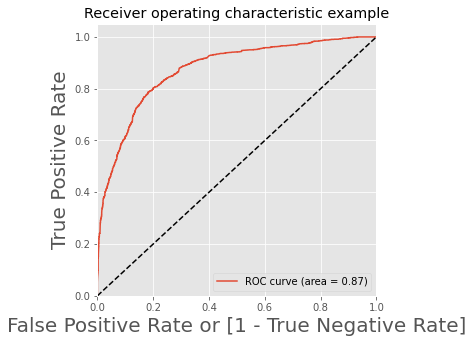

In [92]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [93]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.968381,3188,1,1,1,1,1,1,1,1,1,1,1
1,0,0.139664,8278,0,1,1,0,0,0,0,0,0,0,0
2,0,0.670764,8129,1,1,1,1,1,1,1,1,0,0,0
3,1,0.680560,2393,1,1,1,1,1,1,1,1,0,0,0
4,0,0.127987,1016,0,1,1,0,0,0,0,0,0,0,0


In [94]:
# Now let's calculate accuracy, sensitivity ans specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.441046  1.000000  0.000000
0.1   0.1  0.554267  0.983781  0.215357
0.2   0.2  0.728170  0.934564  0.565313
0.3   0.3  0.778490  0.886465  0.693292
0.4   0.4  0.800197  0.799217  0.800971
0.5   0.5  0.800937  0.724273  0.861430
0.6   0.6  0.776024  0.627517  0.893204
0.7   0.7  0.754810  0.532438  0.930274
0.8   0.8  0.728416  0.432886  0.961606
0.9   0.9  0.682042  0.293624  0.988526


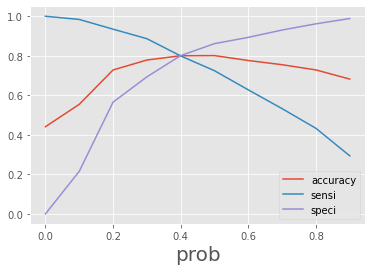

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [96]:
# From the curve above 0.4 (approx), is the optimum point to take it as a cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.968381,3188,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.139664,8278,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.670764,8129,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.680560,2393,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.127987,1016,0,1,1,0,0,0,0,0,0,0,0,0


In [97]:
# Precision and Recall

# Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[1952,  314],
       [ 493, 1295]], dtype=int64)

In [98]:
# Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [99]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8048477315102548

In [100]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7242729306487695

In [101]:
#Precision and recall trade-off

from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4049    1
 4050    1
 4051    0
 4052    0
 4053    1
 Name: Converted, Length: 4054, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 4049    1
 4050    1
 4051    0
 4052    0
 4053    0
 Name: Predicted, Length: 4054, dtype: int64)

In [102]:
p,r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

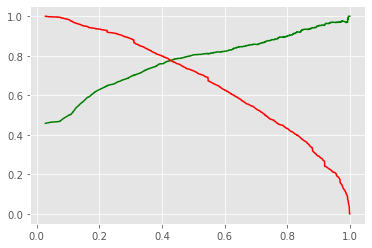

In [103]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [104]:
# Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified
7614,0.022429,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7388,-0.741640,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7657,-0.961241,1,0,0,0,0,0,0,0,0,0,0,1,0,0
965,-0.385921,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6875,0.967987,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [105]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.drop(['What is your current occupation_Housewife','Lead Origin_Lead Add Form','Lead Source_Welingak Website'], axis = 1, inplace = True)
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Referral Sites,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified
7614,1.0,0.022429,1,0,0,1,0,0,0,0,0,0,0
7388,1.0,-0.741640,1,0,0,0,0,0,0,0,0,0,0
7657,1.0,-0.961241,1,0,0,0,0,0,0,0,1,0,0
965,1.0,-0.385921,1,0,0,0,0,0,0,0,0,0,1
6875,1.0,0.967987,1,0,0,0,0,0,0,0,0,0,1


In [106]:
y_test_pred = res.predict(X_test_sm)

In [107]:
#Converting the y_test_pred to dataframe, which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [108]:
# Let's see the head
y_pred_1.head()

,0
7614,0.187953
7388,0.320667
7657,0.122549
965,0.141271
6875,0.404641


In [109]:
# Coverting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [110]:
# Putting the Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [111]:
# Removing index for both dataframe to append them side by side
y_pred_1.reset_index(drop=True, inplace = True)
y_test_df.reset_index(drop=True, inplace = True)

In [112]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,7614,0.187953
1,0,7388,0.320667
2,0,7657,0.122549
3,0,965,0.141271
4,0,6875,0.404641


In [113]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns = { 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob
0,0,7614,0.187953
1,0,7388,0.320667
2,0,7657,0.122549
3,0,965,0.141271
4,0,6875,0.404641


In [114]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'], axis=1)
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,7614,0,0.187953
1,7388,0,0.320667
2,7657,0,0.122549
3,965,0,0.141271
4,6875,0,0.404641


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,7614,0,0.187953,0
1,7388,0,0.320667,0
2,7657,0,0.122549,0
3,965,0,0.141271,0
4,6875,0,0.404641,0


In [116]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7951668584579977

In [117]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[810, 182],
       [174, 572]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positivities
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# sensitivity
TP/ float(TP+FN)

0.7667560321715817

In [120]:
# specificity
TN / float(TN+FP)

0.8165322580645161

In [121]:
# Calculate Precision

TP/(TP+FP)

0.7586206896551724

In [122]:
# Calculate Recall

TP/(TP+FN)

0.7667560321715817